# Looking at the data / Preprocessing

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
original_df = pd.read_csv("Churn_Modelling.csv")
original_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = original_df

#Remove row and customer identifiers
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
# CreditScore Geography Gender Age Tenure Balance NumOfProducts HasCrCard IsActiveMember EstimatedSalary Exited
numeric = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
categorical = ["Geography", "Gender", "HasCrCard", "IsActiveMember", "Exited"]

df[numeric].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


In [ ]:
for x in categorical:
    print(df[x].value_counts(), "\n")

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64 

Gender
Male      5457
Female    4543
Name: count, dtype: int64 

HasCrCard
1    7055
0    2945
Name: count, dtype: int64 

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64 

Exited
0    7963
1    2037
Name: count, dtype: int64 



Tenure of 0 is a valid input, not a missing value. It is measured in years so it can represent the users that are tenured for less than a year.

In [ ]:
print("How many 0 tenure years are there?:", len(df[df["Tenure"] == 0]), "\n")

df[(df["Tenure"] == 0)].head()

How many 0 tenure years are there?: 413 



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
29,411,France,Male,29,0,59697.17,2,1,1,53483.21,0
35,475,France,Female,45,0,134264.04,1,1,0,27822.99,1
57,725,Germany,Male,19,0,75888.20,1,0,0,45613.75,0
72,657,Spain,Female,37,0,163607.18,1,0,1,44203.55,0
127,625,Germany,Male,56,0,148507.24,1,1,0,46824.08,1


I see that "Balance" has missing values and the author set them to 0

In [ ]:
print("How many 0 balances are there?:", len(df[df["Balance"] == 0]), "\n")

#Drop rows with "Balance" == 0
df = df.drop(df.index[df["Balance"] == 0])

df["Balance"].describe()

How many 0 balances are there?: 3617 



count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: Balance, dtype: float64

Data after preprocessing

In [ ]:
df[numeric].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000
mean,651.138493,39.197713,4.979633,119827.493793,1.386025,100717.352956
std,96.934609,10.476208,2.909514,30095.056462,0.577011,57380.316584
min,350.000000,18.000000,0.000000,3768.690000,1.000000,11.580000
25%,584.000000,32.000000,2.000000,100181.975000,1.000000,51736.850000
50%,652.000000,38.000000,5.000000,119839.690000,1.000000,101139.300000
75%,718.000000,44.000000,8.000000,139512.290000,2.000000,149596.615000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199970.740000


In [ ]:
for x in categorical:
    print(df[x].value_counts(), "\n")

Geography
France     2596
Germany    2509
Spain      1278
Name: count, dtype: int64 

Gender
Male      3494
Female    2889
Name: count, dtype: int64 

HasCrCard
1    4463
0    1920
Name: count, dtype: int64 

IsActiveMember
1    3278
0    3105
Name: count, dtype: int64 

Exited
0    4846
1    1537
Name: count, dtype: int64 



# Visualizations
Visualizations uses the preprocessed data

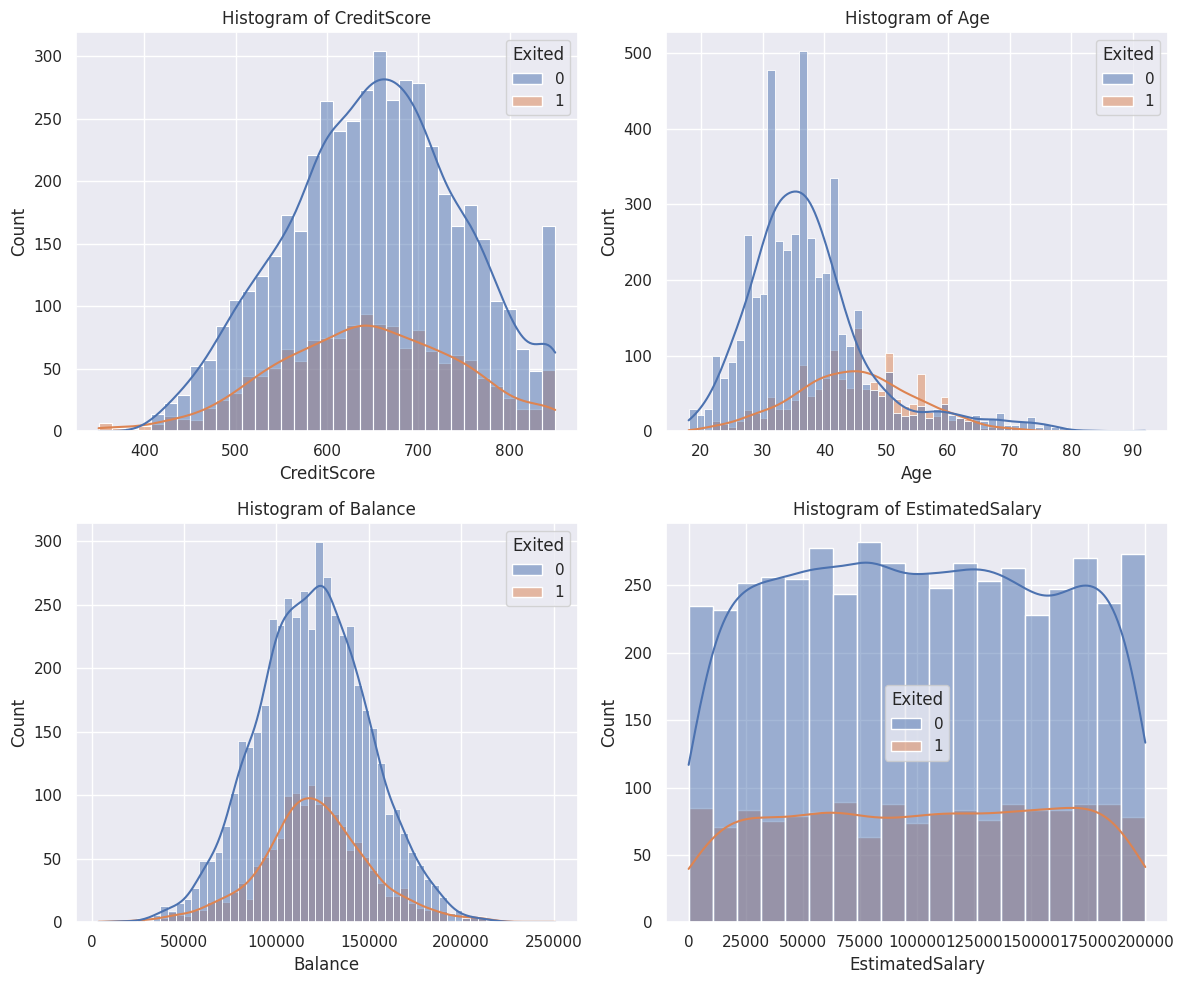

In [ ]:
sns.set_theme(style="darkgrid")
hist = ["CreditScore", "Age", "Balance", "EstimatedSalary"]

plt.figure(figsize=(12, 10))
for i in range(len(hist)):

  plt.subplot(2, 2, i+1)

  sns.histplot(x = df[hist[i]], kde = True, hue = df["Exited"]).set(title = f"Histogram of {hist[i]}")

  plt.tight_layout()

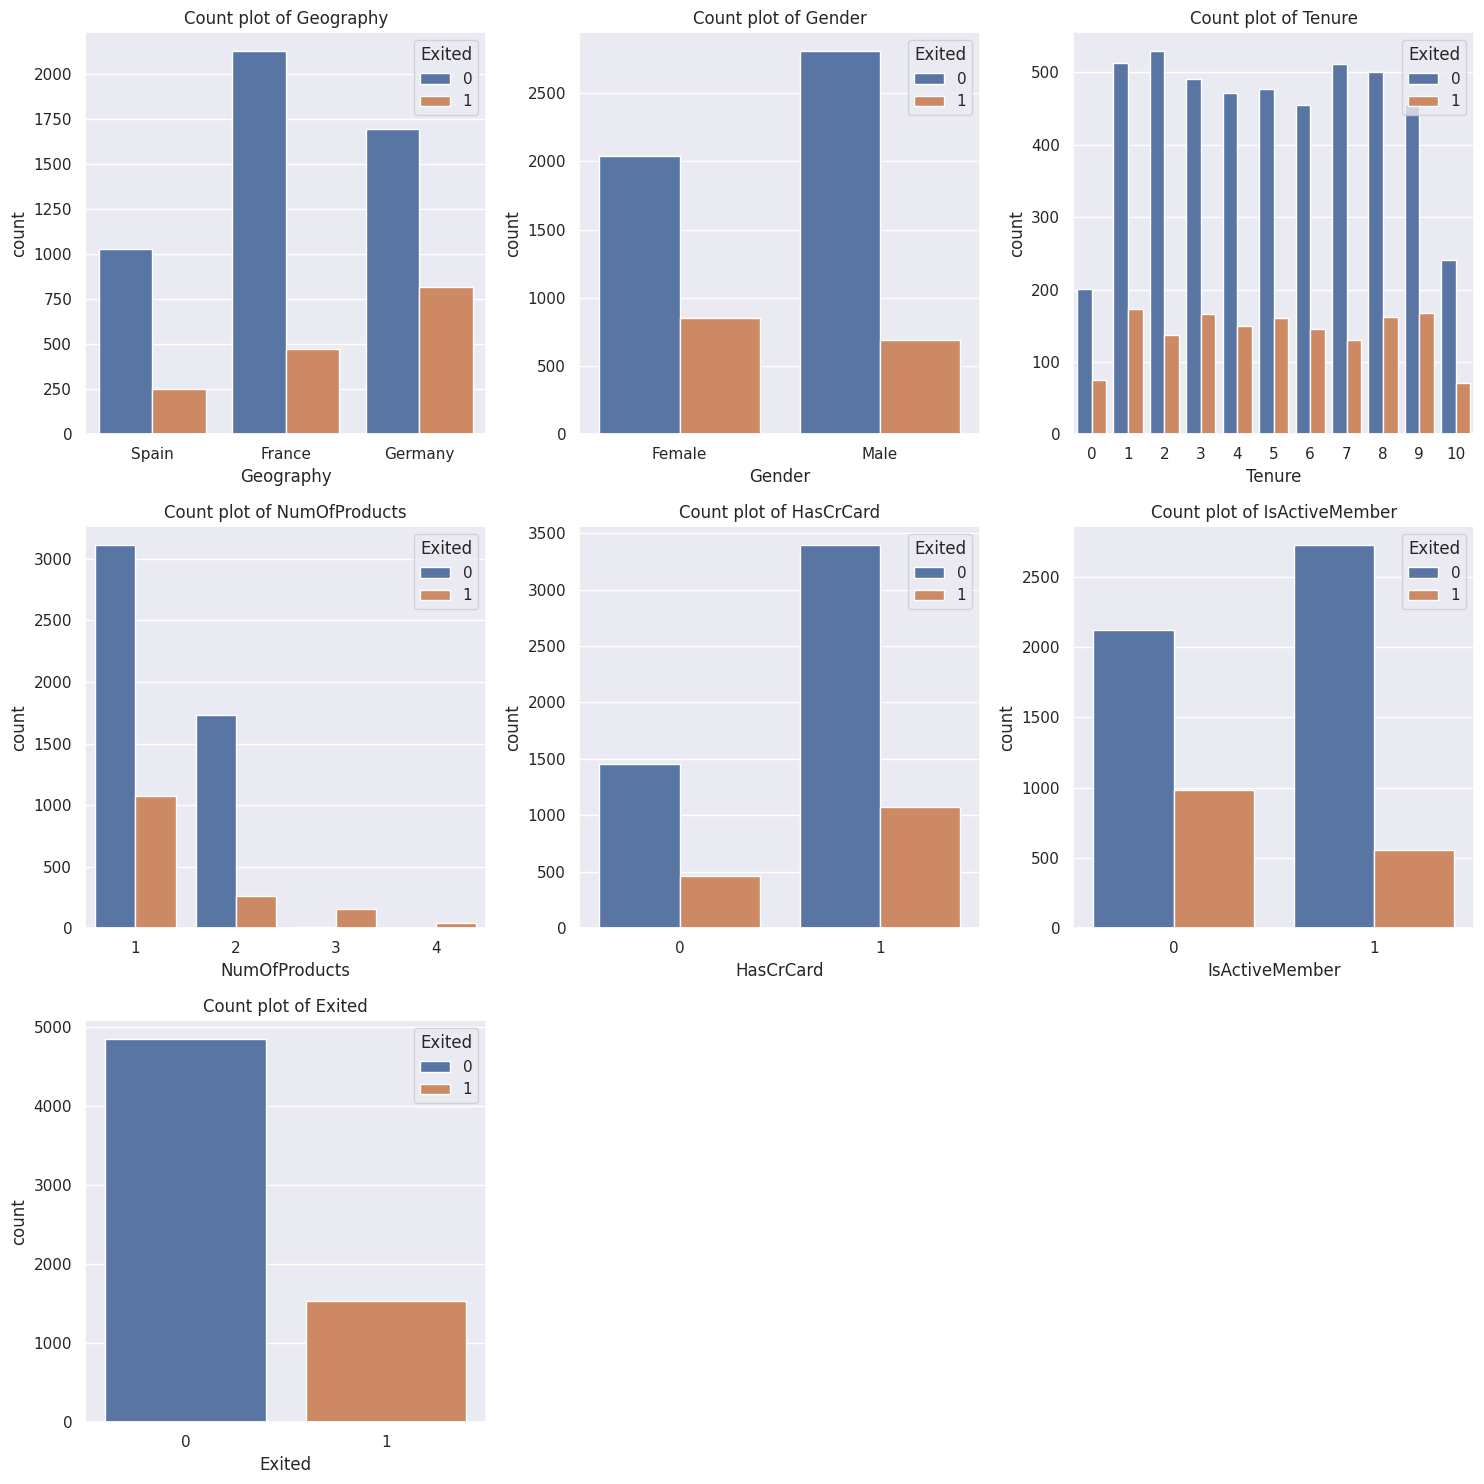

In [ ]:
count = ["Geography", "Gender", "Tenure", "NumOfProducts","HasCrCard", "IsActiveMember","Exited"]
plt.figure(figsize=(15, 15))
for i in range(len(count)):

  plt.subplot(3, 3, i+1)

  sns.countplot(x = df[count[i]], orient = "v", hue = df["Exited"]).set(title = f"Count plot of {count[i]}")

  plt.tight_layout()

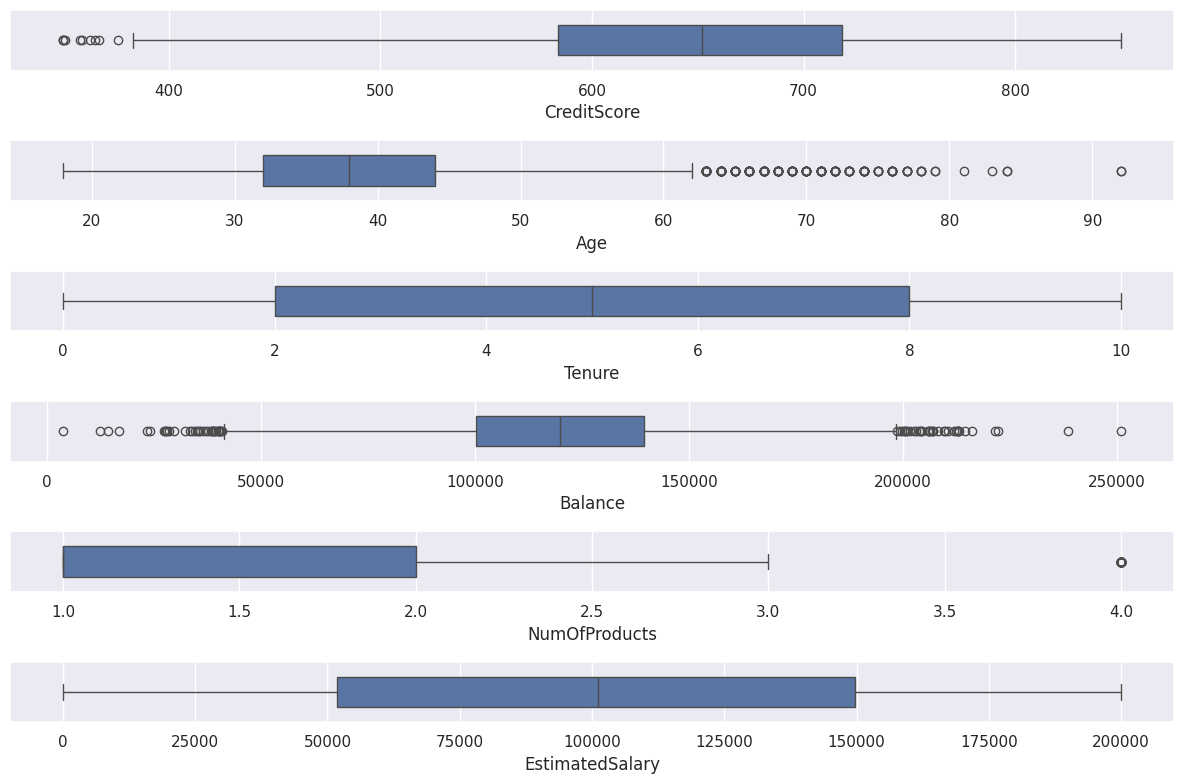

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(len(numeric)):

  plt.subplot(len(numeric), 1, i+1)

  sns.boxplot(x = df[numeric[i]], width = 0.5)

  plt.tight_layout()

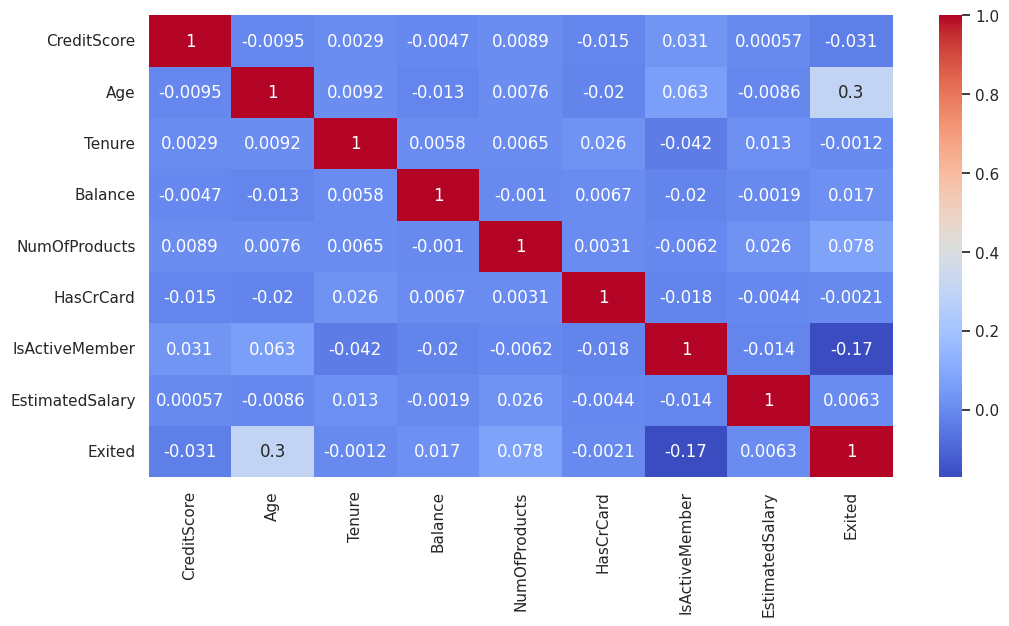

In [ ]:
plt.figure(figsize = (12,6))
sns.heatmap(df[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "Exited"]].corr(), annot=True, cmap="coolwarm")
plt.show()

# Analysis / Answering Questions

## What are the Credit Score profiles of customers based on geographical location? Are they different from one another?

In [ ]:
print(df.groupby("Geography")["CreditScore"].mean(), "\n")
print(df.groupby("Geography")["CreditScore"].var(), "\n")

Geography
France     650.900231
Germany    651.453567
Spain      651.003912
Name: CreditScore, dtype: float64 

Geography
France     9436.408154
Germany    9637.140287
Spain      8856.270149
Name: CreditScore, dtype: float64 



The values are pretty close to each other, lets perform hypothesis testing to get a closer look:

Null Hypothesis: There is no statistical difference in the average Credit Score between Germany and Spain.

Alternative Hypothesis: There is a statistical difference in the average Credit Score between Germany and Spain.

P = 0.01

In [ ]:
stats.ttest_ind(df.loc[df["Geography"] == "Germany"]["CreditScore"], df.loc[df["Geography"] == "Spain"]["CreditScore"])

TtestResult(statistic=0.13514255118676488, pvalue=0.8925063537484963, df=3785.0)

Germany has the mean credit score of 651 and Spain has the mean credit score of 651. With a p value of 0.89, I failed to reject the null hypothesis. The difference is not statistically significant at p = 0.01.

What if we compared all 3 geographical locations?

Null Hypothesis: There is no statistical difference in the average Credit Score between France, Germany, and Spain.

Alternative Hypothesis: There is a statistical difference in the average Credit Score between France, Germany, and Spain.

P = 0.01

In [ ]:
anova_result = stats.f_oneway(df.loc[df["Geography"] == "France"]["CreditScore"], df.loc[df["Geography"] == "Germany"]["CreditScore"], df.loc[df["Geography"] == "Spain"]["CreditScore"])
anova_result

F_onewayResult(statistic=0.022320597076373655, pvalue=0.9779267407245703)

France has the mean credit score of 650, Germany has the mean credit score of 651, Spain has the mean credit score of 651. With the p value of 0.97, I failed to reject the null hypothesis. The difference is not statistically significant at p = 0.01.

## Is there a difference between the Balance's of customers that have churned and the ones that stayed?



The means for Balance look similar, lets perform a T test on them

Null Hypothesis: There is no statistical difference in the customer's Balance regardless of whether they exited.

Alternative Hypothesis: There is a statistical difference in the customer's average Balance based on if they exited.

In [ ]:
print(df.groupby("Exited")["Balance"].mean(), "\n")

stats.ttest_ind(df.loc[df["Exited"] == 0]["Balance"], df.loc[df["Exited"] == 1]["Balance"])

Exited
0    119535.864270
1    120746.971132
Name: Balance, dtype: float64 



TtestResult(statistic=-1.374781881782122, pvalue=0.16924734893322796, df=6381.0)

Those who stayed have the mean balance of 119535, those who churned have the mean balance of 120746. With a p value of 0.16, I failed to reject the null hypothesis. The difference is not statistically significant at p = 0.01.

## Is there a relationship between Age and Exited? (Chi Squared Test)

What if we made Age categorical and compared the age groups for those who have churned and those who stayed? Turning age to categorical allows us to use a chi-squared test.

Using the histogram for Age, I can approximate 3 age buckets.

In [ ]:
print(df["Age"].describe(), "\n")

df.loc[(df["Age"] >= 18) & (df["Age"] < 30), "Age_Categorical"] = "Young"
df.loc[(df["Age"] >= 30) & (df["Age"] < 45), "Age_Categorical"] = "Middle"
df.loc[(df["Age"] >= 45), "Age_Categorical"] = "Old"

df.head(5)

count    6383.000000
mean       39.197713
std        10.476208
min        18.000000
25%        32.000000
50%        38.000000
75%        44.000000
max        92.000000
Name: Age, dtype: float64 



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Categorical
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Middle
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Middle
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Middle
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,Middle
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,Young


In [ ]:
age_contingency = pd.crosstab(df['Age_Categorical'], df['Exited'])
age_contingency

Exited,0,1
Age_Categorical,,
Middle,3157,655
Old,790,783
Young,899,99


Null hypothesis: There is no relationship between the Exited and Age categorical variables.

Alternative hypothesis: There is a relationship between the Exited and Age categorical variables.

In [ ]:
age_results = stats.chi2_contingency(age_contingency)
age_results

Chi2ContingencyResult(statistic=776.8644784825769, pvalue=2.0231212147506052e-169, dof=2, expected_freq=array([[2894.08616638,  917.91383362],
       [1194.22810591,  378.77189409],
       [ 757.68572771,  240.31427229]]))

With this low p-value, we can reject the null hypothesis. Based on the statistic of 776, there is a very strong relationship between churning and age group.

Lets compare how different our results are from the expected results:

<Axes: xlabel='Exited', ylabel='Age_Categorical'>

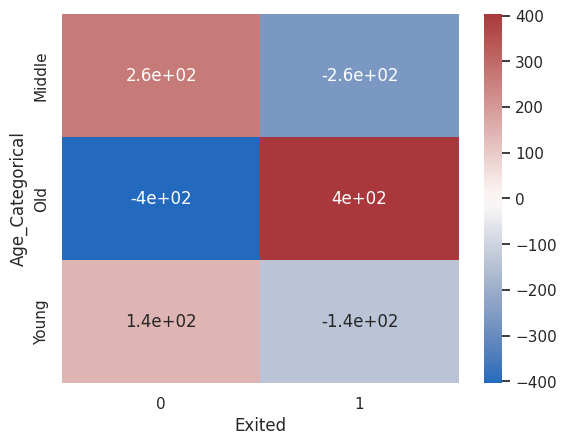

In [ ]:
sns.heatmap(
    age_contingency - age_results.expected_freq,
    cmap='vlag',
    annot=True
)

We can visualize our actual values and the expected value using a heatmap, we can see that many middle and young-aged customers did not churn compared to the expected value. For the old aged customers, many of them churned more than expected.

## Is there a relationship between IsActiveMember and Exited? (Chi Squared Test)

On our correlation matrix, being an active member and exited have a weak negative relationship. Lets look at it in more detail using a chi squared test.

Null hypothesis: There is no relationship between the Exited and IsActiveMember categorical variables.

Alternative hypothesis: There is a relationship between the Exited and IsActiveMember categorical variables.

In [ ]:
active_member_contingency = pd.crosstab(df['IsActiveMember'], df['Exited'])
active_member_contingency

Exited,0,1
IsActiveMember,,
0,2123,982
1,2723,555


In [ ]:
active_member_results = stats.chi2_contingency(active_member_contingency)
active_member_results

Chi2ContingencyResult(statistic=187.561138782183, pvalue=1.0831770089767832e-42, dof=1, expected_freq=array([[2357.32884224,  747.67115776],
       [2488.67115776,  789.32884224]]))

With this low p-value, we can reject the null hypothesis. Based on the statistic of 187, there is a strong relationship between churning and being an active member.

Lets compare how different our results are from the expected results:

<Axes: xlabel='Exited', ylabel='IsActiveMember'>

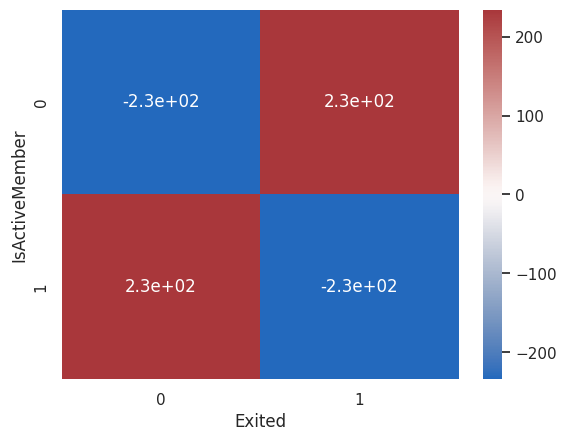

In [ ]:
sns.heatmap(
    active_member_contingency - active_member_results.expected_freq,
    cmap='vlag',
    annot=True
)

Using the heatmap to compare the expected values and our actual values we can see that more people who are active members stayed than expected. More people who aren't active members exited than expected. Fewer people who are not active members stayed than expected and fewer people who are active members churned than expected.

# Clustering Analysis

In [ ]:
#Remove row and customer identifiers
df_churn = original_df
df_churn = df_churn.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
df_churn = df_churn.drop(df_churn.index[df_churn["Balance"] == 0])

Preprocess data:
Get dummies for categorical variables
Z-score normalize numeric variables

In [ ]:
df_churn_dummies = pd.get_dummies(df_churn[["Geography", "Gender"]])

df_churn_dummies.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
1,False,False,True,True,False
2,True,False,False,True,False
4,False,False,True,True,False
5,False,False,True,False,True
7,False,True,False,True,False


In [ ]:
df_churn_norm = df_churn[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]]

df_churn_norm = (df_churn_norm - df_churn_norm.mean()) / df_churn_norm.std()

df_churn_norm.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
1,-0.445027,0.172036,-1.3678,-1.196862,0.206085
2,-1.538547,0.267491,1.0381,1.323583,0.230292
4,2.051502,0.362945,-1.0241,0.188846,-0.377015
5,-0.063326,0.458399,1.0381,-0.201751,0.854637
7,-2.838393,-0.973416,-0.3367,-0.158855,0.324668


In [ ]:
df_churn_preprocessed_norm = pd.concat([df_churn_norm, df_churn_dummies, df_churn[["NumOfProducts", 'HasCrCard', 'IsActiveMember', "Exited"]]], axis = 1)

df_churn_preprocessed = pd.concat([df_churn[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]], df_churn_dummies, df_churn[["NumOfProducts", 'HasCrCard', 'IsActiveMember', "Exited"]]], axis = 1)

df_churn_preprocessed.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts,HasCrCard,IsActiveMember,Exited
1,608,41,1,83807.86,112542.58,False,False,True,True,False,1,0,1,0
2,502,42,8,159660.80,113931.57,True,False,False,True,False,3,1,0,1
4,850,43,2,125510.82,79084.10,False,False,True,True,False,1,1,1,0
5,645,44,8,113755.78,149756.71,False,False,True,False,True,2,1,0,1
7,376,29,4,115046.74,119346.88,False,True,False,True,False,4,1,0,1


Determining K using the elbow method.

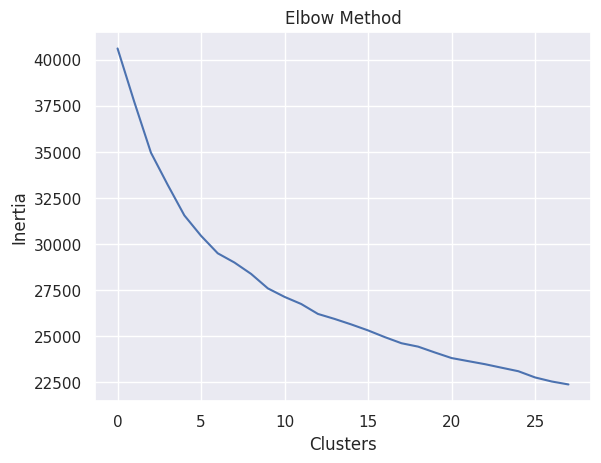

In [ ]:
inertias = []

for k in range(2, 30):
  kmeans = KMeans(n_clusters=k, n_init='auto', random_state = 0)
  kmeans.fit(df_churn_preprocessed_norm)
  inertias.append(kmeans.inertia_)


plt.title("Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.plot(inertias)
plt.show()

Clustering analysis

In [ ]:
kmeans = KMeans(n_clusters=8, n_init='auto', random_state = 0)
df_churn_preprocessed['cluster'] = kmeans.fit_predict(df_churn_preprocessed_norm)
df_churn_preprocessed_norm['cluster'] = kmeans.fit_predict(df_churn_preprocessed_norm)

In [ ]:
df_churn_preprocessed.groupby('cluster').mean().T

cluster,0,1,2,3,4,5,6,7
CreditScore,554.531335,636.848249,742.265359,649.302476,674.723077,648.540091,554.657143,740.054455
Age,37.787466,35.963684,36.328105,36.255113,36.156044,60.573374,37.070807,37.722772
Tenure,7.410082,5.272374,2.584314,7.616792,2.248352,4.773071,2.483230,7.460396
Balance,115479.850109,79295.902503,123686.140105,139161.129559,113177.235374,118494.047292,140030.334522,125023.127215
EstimatedSalary,149685.732071,66250.617108,52416.159359,50624.459752,160821.042549,91672.318245,84931.129329,147883.311361
Geography_France,0.382834,0.463035,0.392157,0.429494,0.417582,0.358548,0.422360,0.373762
Geography_Germany,0.426431,0.298314,0.443137,0.377826,0.383516,0.440242,0.359006,0.429455
Geography_Spain,0.190736,0.238651,0.164706,0.192680,0.198901,0.201210,0.218634,0.196782
Gender_Female,0.489101,0.486381,0.453595,0.411195,0.483516,0.496218,0.388820,0.426980
Gender_Male,0.510899,0.513619,0.546405,0.588805,0.516484,0.503782,0.611180,0.573020


Sort them by mean exit percentage

In [ ]:
df_churn_preprocessed.groupby('cluster').mean().sort_values(["Exited"]).T

cluster,1,4,3,2,6,7,0,5
CreditScore,636.848249,674.723077,649.302476,742.265359,554.657143,740.054455,554.531335,648.540091
Age,35.963684,36.156044,36.255113,36.328105,37.070807,37.722772,37.787466,60.573374
Tenure,5.272374,2.248352,7.616792,2.584314,2.483230,7.460396,7.410082,4.773071
Balance,79295.902503,113177.235374,139161.129559,123686.140105,140030.334522,125023.127215,115479.850109,118494.047292
EstimatedSalary,66250.617108,160821.042549,50624.459752,52416.159359,84931.129329,147883.311361,149685.732071,91672.318245
Geography_France,0.463035,0.417582,0.429494,0.392157,0.422360,0.373762,0.382834,0.358548
Geography_Germany,0.298314,0.383516,0.377826,0.443137,0.359006,0.429455,0.426431,0.440242
Geography_Spain,0.238651,0.198901,0.192680,0.164706,0.218634,0.196782,0.190736,0.201210
Gender_Female,0.486381,0.483516,0.411195,0.453595,0.388820,0.426980,0.489101,0.496218
Gender_Male,0.513619,0.516484,0.588805,0.546405,0.611180,0.573020,0.510899,0.503782


Cluster 5 has the most churn (0.46) while Cluster 1 has the least (0.16). Comparing the two, the age of cluster 5 (60) is almost double of that in cluster 1 (35). The balance of cluster 5 (118494) is about 40% higher than cluster 1's (79295). The estimated salary follows a similar pattern, 91672 to 66250. The majority of cluster 5's location is in Germany while the majority of cluster 1's location is in France. Most people in Germany are churning while Most people in France are staying. Finally, cluster 5's active member percentage is about 68% while cluster 1's is 51%.

# PCA / KNN

As we saw on our correlation matrix, we didnt see any correlations that stand out. I hypothesise that because of the lack of correlation, a KNN classifier would perform poorly. We double check this by graphing the PCA representation.

In [ ]:
unsplit_df = original_df

unsplit_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
unsplit_df_dummies = pd.get_dummies(unsplit_df[["Geography", "Gender"]])

unsplit_df_dummies.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,True,False,False,True,False
1,False,False,True,True,False
2,True,False,False,True,False
3,True,False,False,True,False
4,False,False,True,True,False


In [ ]:
unsplit_df_norm = unsplit_df[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]]

unsplit_df_norm = (unsplit_df_norm - unsplit_df_norm.mean()) / unsplit_df_norm.std()

unsplit_df_norm.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
0,-0.326205,0.293503,-1.041708,-1.225786,0.021885
1,-0.440014,0.198154,-1.387468,0.117344,0.216523
2,-1.536717,0.293503,1.032856,1.332987,0.240675
3,0.501496,0.007456,-1.387468,-1.225786,-0.108912
4,2.063781,0.388852,-1.041708,0.785689,-0.365258


In [ ]:
unsplit_df_preprocessed_norm = pd.concat([unsplit_df_norm, unsplit_df_dummies, unsplit_df[["NumOfProducts", 'HasCrCard', 'IsActiveMember', "Exited"]]], axis = 1)
unsplit_df_preprocessed_norm.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,-0.326205,0.293503,-1.041708,-1.225786,0.021885,True,False,False,True,False,1,1,1,1
1,-0.440014,0.198154,-1.387468,0.117344,0.216523,False,False,True,True,False,1,0,1,0
2,-1.536717,0.293503,1.032856,1.332987,0.240675,True,False,False,True,False,3,1,0,1
3,0.501496,0.007456,-1.387468,-1.225786,-0.108912,True,False,False,True,False,2,0,0,0
4,2.063781,0.388852,-1.041708,0.785689,-0.365258,False,False,True,True,False,1,1,1,0


In [ ]:
pca = PCA(random_state = 1)

pca_data = pca.fit_transform(unsplit_df_preprocessed_norm.drop("Exited", axis = 1))

print(pca_data, "\n")

print(pca.explained_variance_ratio_, "\n")

[[-8.53677407e-01  9.95913039e-01  3.46657396e-01 ... -2.99205720e-01
   4.39334480e-16  8.57804638e-17]
 [ 4.56987103e-01  7.92705789e-01  4.25541793e-01 ...  9.91692410e-02
  -4.67114914e-16 -1.29620563e-16]
 [ 6.71368960e-01 -6.04493655e-01  1.59624464e+00 ...  1.11965390e+00
  -6.50672828e-16 -1.05245809e-16]
 ...
 [-1.28627592e+00  3.41961649e-01 -7.97857075e-01 ... -6.17736739e-01
  -8.93122333e-17 -3.02130455e-17]
 [ 3.21585487e-01  3.80666861e-01 -1.22720671e+00 ... -4.44631425e-01
  -9.38057530e-17 -2.72659161e-17]
 [ 4.44459003e-01  1.08939795e-01 -1.84508780e+00 ...  3.21251211e-01
   6.58498205e-17 -1.90544202e-19]] 

[1.61404675e-01 1.46724667e-01 1.44779447e-01 1.43295148e-01
 1.42108833e-01 7.17124732e-02 5.26679152e-02 4.34151544e-02
 3.57344954e-02 3.01705421e-02 2.79866500e-02 1.12566104e-32
 2.82586580e-34] 



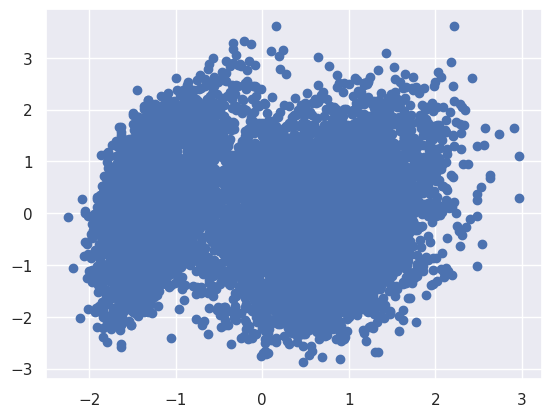

In [ ]:
plt.scatter(pca_data[:,0], pca_data[:,1])

KNN Classifier

In [ ]:
# Split the data, 10000 total, 6000 training, 2000 validation and testing.

unsplit_df_preprocessed_norm.head()

print("Total samples:", len(unsplit_df_preprocessed_norm) , "\n")

train_df = unsplit_df_preprocessed_norm[:6000]
print("Training samples:", len(train_df) , "\n")

val_df = unsplit_df_preprocessed_norm[6000:8000]
print("Validation samples:", len(val_df) , "\n")

test_df = unsplit_df_preprocessed_norm[8000:]
print("Training samples:", len(test_df) , "\n")

Total samples: 10000 

Training samples: 6000 

Validation samples: 2000 

Training samples: 2000 



In [ ]:
knn = KNeighborsClassifier()
knn.fit(train_df.drop("Exited", axis = 1), train_df["Exited"])

KNeighborsClassifier()

In [ ]:
train_pred = knn.predict(train_df.drop("Exited", axis = 1))

print(train_pred, "\n")

f1_score(train_df["Exited"], train_pred)

[0 0 1 ... 0 0 0] 



0.6128712871287129

In [ ]:
val_pred = knn.predict(val_df.drop("Exited", axis = 1))

print(val_pred, "\n")

f1_score(val_df["Exited"], val_pred)

[0 0 1 ... 0 0 0] 



0.46623794212218655

Fine-tuning

In [ ]:
k_values = [3,5,7,9,11,13]

for k in k_values:
    temp_knn = KNeighborsClassifier(n_neighbors = k)
    temp_knn.fit(train_df.drop("Exited", axis = 1), train_df["Exited"])
    temp_pred = temp_knn.predict(val_df.drop("Exited", axis = 1))
    print("K =", k)
    print("F1 Score:", f1_score(val_df["Exited"], temp_pred), "\n")

K = 3
F1 Score: 0.45603576751117736 

K = 5
F1 Score: 0.46623794212218655 

K = 7
F1 Score: 0.4533333333333333 

K = 9
F1 Score: 0.45923460898502494 

K = 11
F1 Score: 0.4752136752136753 

K = 13
F1 Score: 0.450261780104712 



Final testing accuracy

In [ ]:
best_knn = KNeighborsClassifier(n_neighbors = 11)
best_knn.fit(train_df.drop("Exited", axis = 1), train_df["Exited"])


test_pred = best_knn.predict(test_df.drop("Exited", axis = 1))

print(test_pred, "\n")

f1_score(test_df["Exited"], test_pred)

[0 0 0 ... 0 0 0] 



0.42273534635879223